<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">CountVectorizer, HashingVectorizer, TF-IDF
</h2>
</div>    
</center>

<a id = 'toc'></a>
# Table of Contents

- ### [Calculus](#calculus)
- ### [Data](#data)
- ### [Exploratory Data Analysis](#eda)
- ### [CountVectorizer, HashingVectorizer, TF-IDF](#vec)

<a id = 'calculus'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Calculus
</h2>
</div>    
</center>

<center>
<div style="color:white;
           display:fill;
           border: 0px;
           border: 2px solid #AAA;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">TF-IDF
</h2>
</div>    
</center>

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Main idea
</h2>
</div>    
</left>

**TF-IDF** (Term Frequency - Inverce Document Frequency) - a statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents.

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">TF (Term Frequency)
</h2>
</div>    
</left>

$$ TF = \frac {\textrm{number of times the term appears in the document} }{ \textrm{total number of terms in the document}} $$

- TF of a term or word is the number of times the term appears in a document compared to the total number of words in the document.

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">IDF (Inverse Document Frequency)
</h2>
</div>    
</left>

$$ IDF = log (\frac {\textrm{number of the documents in the corpus}} {\textrm{number of documents in the corpus contain the term}}) $$

- IDF of a term reflects the proportion of documents in the corpus that contain the term. Words unique to a small percentage of documents (e.g., technical jargon terms) receive higher importance values than words common across all documents (e.g., a, the, and).

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">TF-IDF
</h2>
</div>    
</left>

$$ \textit{TF-IDF} = TF * IDF $$

Translated into plain English, importance of a term is high when it occurs a lot in a given document and rarely in others. In short, commonality within a document measured by TF is balanced by rarity between documents measured by IDF. The resulting TF-IDF score reflects the importance of a term for a document in the corpus.

[UP](#toc)

<a id = 'data'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Data
</h2>
</div>    
</center>

## Dataset

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

## Features
- **ham/spam** - ham or spam label
- **text** - sms text

In [32]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import codecs

import string
import nltk
nltk.download('punkt')

from stop_words import get_stop_words
from pymorphy2 import MorphAnalyzer
from string import punctuation

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
exclude = set(punctuation)
sw = set(get_stop_words('en'))
morpher = MorphAnalyzer()
labels = []
sentences = []
sentences_original = []

with codecs.open('spam.csv', 'r', 'ISO-8859-1') as f_out:
    for line in f_out:
        splt = line.split(',')
        labels.append(splt[0])
        spls_original = ''.join(i for i in splt[1:] if i not in exclude)#.split()
        sentences_original.append(spls_original)
        spls = ''.join(i for i in splt[1:] if i not in exclude).split()
        spls = [morpher.parse(i.lower())[0].normal_form for i in spls]
        spls = [i for i in spls if i not in sw and i != '']
        sentences.append(spls)

[UP](#toc)

<a id = 'eda'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Exploratory Data Analysis
</h2>
</div>    
</center>

- [Describe length](#eda_describe)
- [Distribution](#eda_distribution)
- [Preprocessing sentences](#eda_preprocessing)

<a id = 'eda_describe'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Describe length
</h2>
</div>    
</left>

In [34]:
sentences_original = np.array(sentences_original).reshape(-1, 1)
labels = np.array(labels).reshape(-1, 1)

df_original = pd.DataFrame(np.c_[sentences_original, labels], columns = ['messages', 'labels'])
df_original = df_original[1:].reset_index(drop = True)

df_original['len'] = df_original['messages'].apply(len)
df_original['len_words'] = df_original['messages'].apply(lambda x: nltk.word_tokenize(x)).apply(len)
df_original['len_sentences'] = df_original['messages'].apply(lambda x: nltk.sent_tokenize(x)).apply(len)

df_original['labels'] = df_original['labels'].apply(lambda x: 'ham' if x == 'ham"""' else x)

In [35]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
len,5574.0,82.878902,60.016385,2.0,38.0,64.0,126.0,912.0
len_words,5574.0,19.046645,13.867706,0.0,9.0,15.0,27.0,220.0
len_sentences,5574.0,1.975242,1.419949,0.0,1.0,1.5,2.0,28.0


<a id = 'eda_target'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Distribution
</h2>
</div>    
</left>

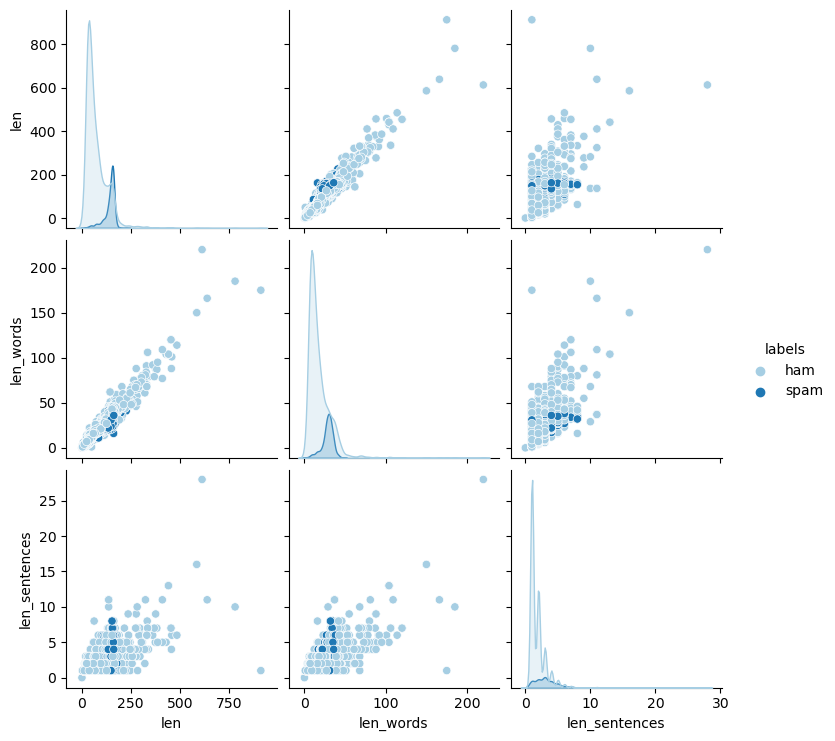

In [36]:
sns.pairplot(data = df_original, hue = 'labels', palette = 'Paired')
plt.show()

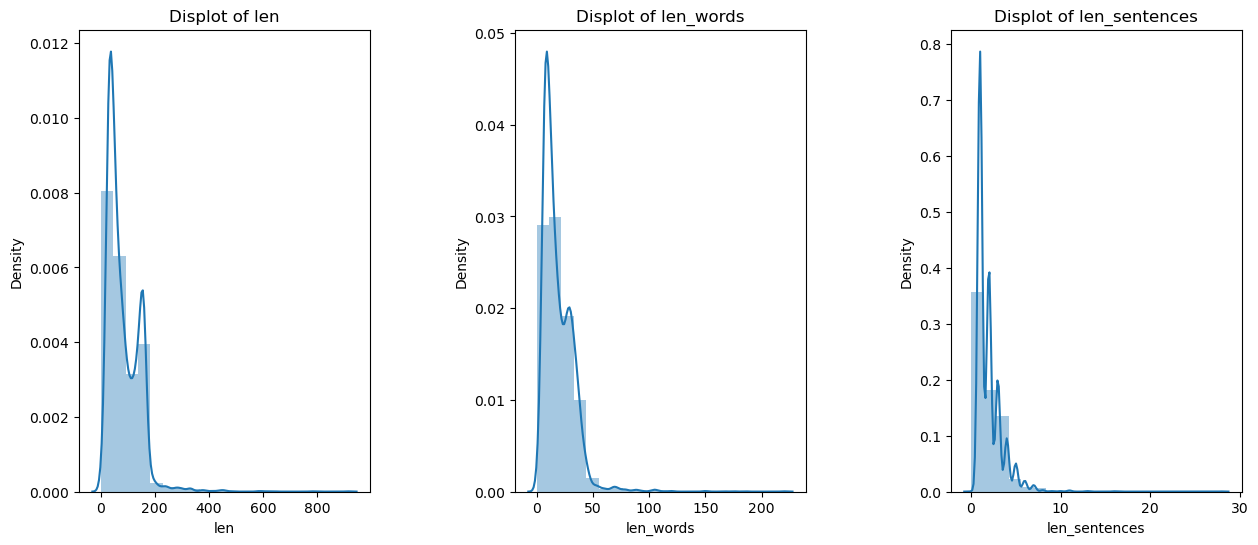

In [37]:
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['len', 'len_words', 'len_sentences']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.distplot(df_original[x], bins = 20)
    plt.title(f'Displot of {x}')
plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  We see a significant deviation in the length distribution for all three feature wise labels.
</div>

<a id = 'eda_preprocessing'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Preprocessing sentences 
</h2>
</div>    
</left>

In [38]:
re_sentences = [' '.join(i) for i in sentences]
re_sentences = np.array(re_sentences).reshape(-1, 1)
re_labels = np.array(labels).reshape(-1, 1)

df = pd.DataFrame(np.c_[re_sentences, re_labels], columns = ['sentences', 'spam'])
df = df.iloc[1:].reset_index(drop = True)
df['spam'] = df['spam'].apply(lambda x: 1 if x == 'spam' else 0)
df['sentences'] = [''.join([k for k in i if k not in exclude]) for i in df['sentences']]

In [39]:
def preprocess_txt(line):
    splt = ''.join(i for i in line.strip() if i not in exclude).split()
    splt = [morpher.parse(i.lower())[0].normal_form for i in splt]
    splt = [i for i in splt if i not in sw and i != '']
    return splt

[UP](#toc)

<a id = 'vec'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">CountVectorizer, HashingVectorizer, TF-IDF
</h2>
</div>    
</center>

- [Train Test Split](#model_tts)
- [Vectorizers](#model_vec)
- [Models](#model_models)

<a id = 'model_tts'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Train Test Split
</h2>
</div>    
</left>

In [40]:
x = df['sentences'].values
y = df['spam'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 11)

<a id = 'model_vec'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Vectorizers
</h2>
</div>    
</left>

In [41]:
count_vec = CountVectorizer()
count_vec = count_vec.fit(x_train, y_train)
x_train_count = count_vec.transform(x_train)
x_test_count = count_vec.transform(x_test)

hashing_vec = HashingVectorizer()
hashing_vec = hashing_vec.fit(x_train, y_train)
x_train_hashing = hashing_vec.transform(x_train)
x_test_hashing = hashing_vec.transform(x_test)

tfidf_vec = TfidfVectorizer()
tfidf_vec = tfidf_vec.fit(x_train, y_train)
x_train_tfidf = tfidf_vec.transform(x_train)
x_test_tfidf = tfidf_vec.transform(x_test)

<a id = 'model_models'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Models
</h2>
</div>    
</left>

In [42]:
def predict_model(classifier, x_train_sample, y_train_sample, x_test_sample, y_test_sample):    
    model = classifier
    model.fit(x_train_sample, y_train_sample)
    y_pred = model.predict(x_test_sample)

    return round(accuracy_score(y_pred, y_test_sample), 2)

### SVM

In [43]:
svc_count = predict_model(SVC(kernel = 'rbf', gamma = 'auto'), x_train_count, y_train, x_test_count, y_test)
svc_hashing = predict_model(SVC(kernel = 'rbf', gamma = 'auto'), x_train_hashing, y_train, x_test_hashing, y_test)
svc_tfidf = predict_model(SVC(kernel = 'rbf', gamma = 'auto'), x_train_tfidf, y_train, x_test_tfidf, y_test)

print(f'[COUNT]: {svc_count}')
print(f'[HASHING]: {svc_hashing}')
print(f'[TF-IDF]: {svc_tfidf}')

[COUNT]: 0.87
[HASHING]: 0.87
[TF-IDF]: 0.87


### Naive Bayes

In [49]:
nb_count = predict_model(naive_bayes.MultinomialNB(), x_train_count, y_train, x_test_count, y_test)
#nb_hashing = predict_model(naive_bayes.MultinomialNB(), x_train_hashing, y_train, x_test_hashing, y_test)
nb_tfidf = predict_model(naive_bayes.MultinomialNB(), x_train_tfidf, y_train, x_test_tfidf, y_test)

print(f'[COUNT]: {nb_count}')
print(f'[HASHING]: negative input')
print(f'[TF-IDF]: {nb_tfidf}')

[COUNT]: 0.98
[HASHING]: negative input
[TF-IDF]: 0.96


### LogisticRegression

In [12]:
lr_count = predict_model(LogisticRegression(), x_train_count, y_train, x_test_count, y_test)
lr_hashing = predict_model(LogisticRegression(), x_train_hashing, y_train, x_test_hashing, y_test)
lr_tfidf = predict_model(LogisticRegression(), x_train_tfidf, y_train, x_test_tfidf, y_test)

print(f'[COUNT]: {lr_count}')
print(f'[HASHING]: {lr_hashing}')
print(f'[TF-IDF]: {lr_tfidf}')

[COUNT]: 0.98
[HASHING]: 0.96
[TF-IDF]: 0.96


### RandomForestClassifier

In [13]:
rf_count = predict_model(RandomForestClassifier(n_estimators = 100), x_train_count, y_train, x_test_count, y_test)
rf_hashing = predict_model(RandomForestClassifier(n_estimators = 100), x_train_hashing, y_train, x_test_hashing, y_test)
rf_tfidf = predict_model(RandomForestClassifier(n_estimators = 100), x_train_tfidf, y_train, x_test_tfidf, y_test)

print(f'[COUNT]: {rf_count}')
print(f'[HASHING]: {rf_hashing}')
print(f'[TF-IDF]: {rf_tfidf}')

[COUNT]: 0.97
[HASHING]: 0.96
[TF-IDF]: 0.97


### XGBoostClassifier

In [14]:
xgb_count = predict_model(XGBClassifier(), x_train_count, y_train, x_test_count, y_test)
xgb_hashing = predict_model(XGBClassifier(), x_train_hashing, y_train, x_test_hashing, y_test)
xgb_tfidf = predict_model(XGBClassifier(), x_train_tfidf, y_train, x_test_tfidf, y_test)

print(f'[COUNT]: {xgb_count}')
print(f'[HASHING]: {xgb_hashing}')
print(f'[TF-IDF]: {xgb_tfidf}')

[COUNT]: 0.97
[HASHING]: 0.97
[TF-IDF]: 0.96


<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  All five models show a good accuracy score. Spam detection works perfectly.
</div>

[UP](#toc)